## ✅ Data Exploration

In [17]:
import pandas as pd

# Load each CSV (make sure these files are in your /data folder)
standard = pd.read_csv("data/standard_stats.csv")
passing = pd.read_csv("data/passing.csv")
defensive = pd.read_csv("data/defensive_actions.csv")
possession = pd.read_csv("data/possession.csv")
sca = pd.read_csv("data/creativity.csv")

# List of metadata columns that often cause duplicates
cols_to_drop = ['Rk', 'Age', 'Nation', 'Pos', '90s', 'Matches', 'Born']

# Drop those columns if they exist in each additional dataframe
for df in [passing, defensive, possession, sca]:
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Merge on Player and Squad (adjust to Player + Team if needed)
df = standard.merge(passing, on=["Player", "Squad"])
df = df.merge(defensive, on=["Player", "Squad"])
df = df.merge(possession, on=["Player", "Squad"])
df = df.merge(sca, on=["Player", "Squad"])

# Drop rows with missing values
df.dropna(inplace=True)

# Optional: Preview first few rows
print(df.shape)
print(df.head())


(47, 114)
    Rk                  Player   Nation    Pos         Squad     Age  Born  \
0  149           Marco Asensio   es ESP  MF,FW   Aston Villa  29-090  1996   
1  150  Jean-Ricner Bellegarde   fr FRA  MF,FW        Wolves  26-298  1998   
2  151        Nathan Broadhead  wls WAL  MF,FW  Ipswich Town  27-016  1998   
3  152             Emi Buendía   ar ARG  MF,FW   Aston Villa  28-117  1996   
4  153           Conor Chaplin  eng ENG  MF,FW  Ipswich Town  28-064  1997   

   MP  Starts    Min  ...   Fld   Def   GCA  GCA90  PassLive.1  PassDead.1  \
0   8       5    466  ...  0.38  0.19  0.58   0.58        0.38         0.0   
1  30      18  1,479  ...  0.43  0.12  0.61   0.61        0.49         0.0   
2  16       6    605  ...  0.00  0.00  0.30   0.30        0.15         0.0   
3  12       0     98  ...  0.00  0.00  0.00   0.00        0.00         0.0   
4  17       7    625  ...  0.00  0.00  0.14   0.14        0.14         0.0   

   TO.1  Sh.1  Fld.1  Def.1  
0  0.00  0.19   0.00  

In [18]:
print(df.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast_x', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG_x', 'npxG+xAG', 'PrgC_x', 'PrgP_x', 'PrgR_x', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches', 'Cmp', 'Att_x', 'Cmp%', 'TotDist_x', 'PrgDist_x', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast_y', 'xAG_y', 'xA', 'A-xAG', 'KP', '45717_x', 'PPA', 'CrsPA', 'PrgP_y', 'Tkl', 'TklW', 'Def 3rd_x', 'Mid 3rd_x', 'Att 3rd_x', 'Tkl.1', 'Att_y', 'Tkl%', 'Lost', 'Blocks', 'Sh_x', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'Def Pen', 'Def 3rd_y', 'Mid 3rd_y', 'Att 3rd_y', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist_y', 'PrgDist_y', 'PrgC_y', '45717_y', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR_y', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_y', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'Pass

### 🧠 Suggested Feature List for Midfielder Style Clustering

In [19]:
features = [
    'Tkl',             # Tackles
    'Int',             # Interceptions
    'Clr',             # Clearances
    'Blocks',          # Blocked shots + passes
    'Touches',         # Overall touches
    'Carries',         # Total ball carries
    'PrgC_y',          # Progressive carries (from possession table)
    'Cmp%',            # Pass completion %
    'Att_x',           # Passes attempted (from passing)
    'PrgP_y',          # Progressive passes (from passing table)
    'xAG.1',           # Expected assisted goals (from SCA table)
    'SCA',             # Shot-creating actions
    'GCA'              # Goal-creating actions
]


### ✅ Step 2: Normalize (Scale) the Data

In [20]:
from sklearn.preprocessing import StandardScaler

# Extract the features
X = df[features].copy()

# Standardize (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🎯 Step 3: Run K-Means Clustering

We’ll assign each midfielder to a group based on their stats — like:

- “Ball-winning destroyer”

- “Deep-lying playmaker”

- “Advanced creator”

In [21]:
from sklearn.cluster import KMeans

# Choose number of clusters
k = 5  # you can try 3, 4, 5 and compare
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\liamb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\liamb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### ✅ Step 4: Visualize Clusters with PCA

- This reduces dimensions (from 13 stats → 2D) so we can see player groups.

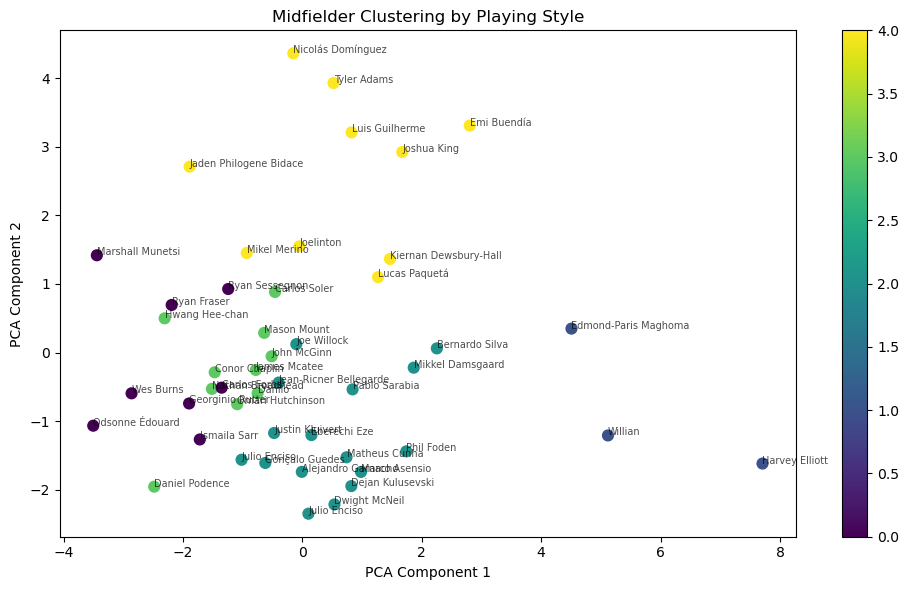

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=df['Cluster'], cmap='viridis', s=60)
plt.title("Midfielder Clustering by Playing Style")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Optional: Label players
for i, player in enumerate(df['Player']):
    plt.text(components[i, 0], components[i, 1], player, fontsize=7, alpha=0.7)

plt.colorbar(scatter)
plt.tight_layout()
plt.show()

## ✅ What’s Next: Cluster Breakdown & Insights
We’ll now:

🧠 Interpret each cluster

🕸️ Build radar charts per cluster

💾 Export labeled data

### 🧠 Step 1: Understand Each Cluster’s Playing Style

In [23]:
# Average stats per cluster
cluster_profiles = df.groupby('Cluster')[features].mean().round(2)
print(cluster_profiles)

          Tkl   Int   Clr  Blocks  Touches  Carries  PrgC_y   Cmp%  Att_x  \
Cluster                                                                     
0        1.93  0.46  1.40    0.97    36.96    20.04    2.42  67.30  24.34   
1        1.38  0.61  1.03    1.01    86.60    54.67    3.12  85.10  75.10   
2        1.48  0.49  0.61    0.90    50.87    30.71    3.14  75.57  38.44   
3        1.16  0.42  0.63    1.03    43.53    23.60    1.89  78.72  33.76   
4        3.26  1.09  1.78    2.14    57.56    29.02    1.43  81.65  42.79   

         PrgP_y  xAG.1   SCA   GCA  
Cluster                             
0          2.23   0.12  2.20  0.28  
1         12.33   0.21  4.34  0.59  
2          4.37   0.20  3.89  0.46  
3          3.20   0.07  2.22  0.25  
4          4.02   0.14  2.89  0.14  


### 🕸️ Step 2: Build radar charts per cluster 

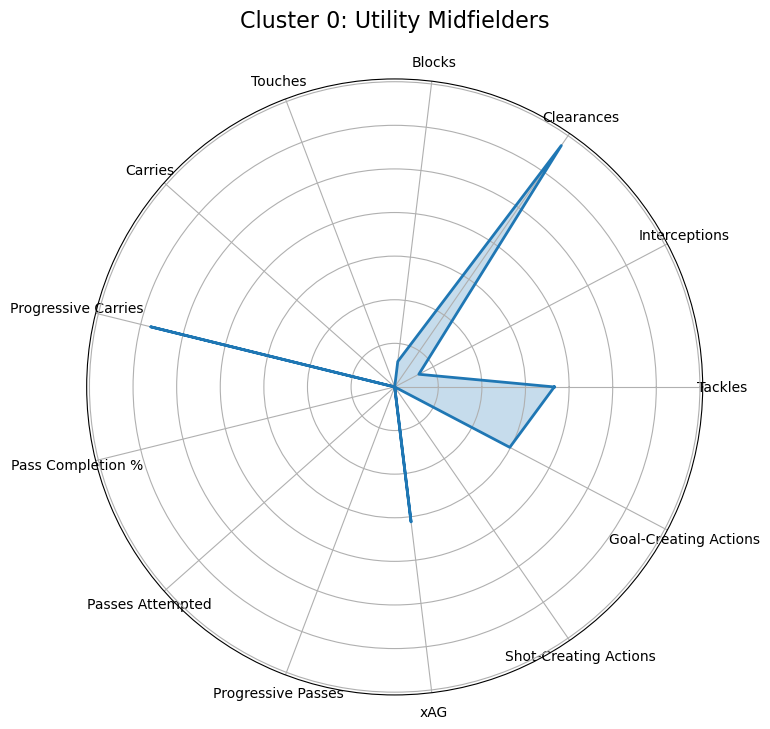


🔹 Cluster 0: Utility Midfielders (8 players)
 - Odsonne Édouard
 - Carlos Forbs
 - Marshall Munetsi
 - Georginio Rutter
 - Ismaila Sarr
 - Wes Burns
 - Ryan Fraser
 - Ryan Sessegnon


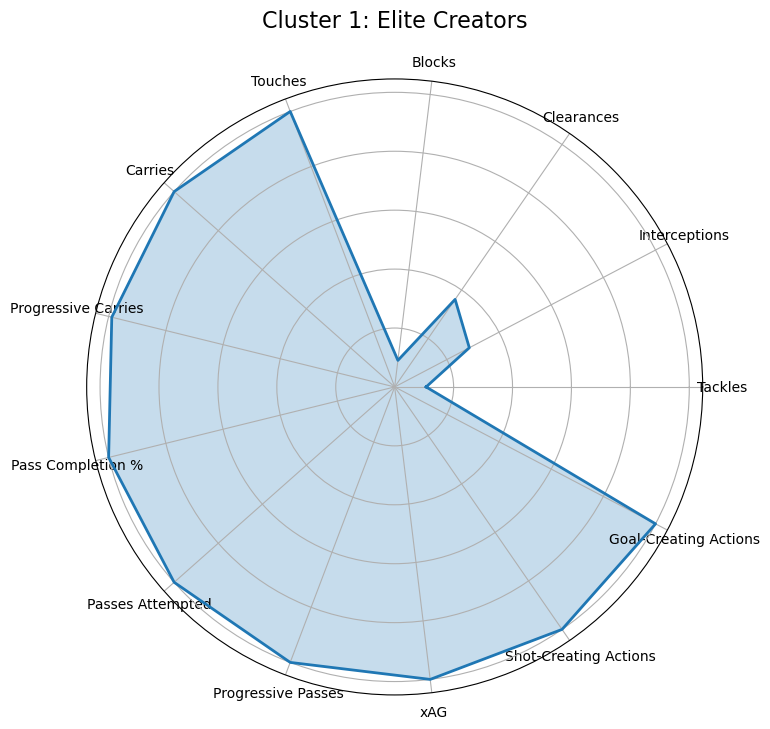


🔹 Cluster 1: Elite Creators (3 players)
 - Harvey Elliott
 - Edmond-Paris Maghoma
 - Willian


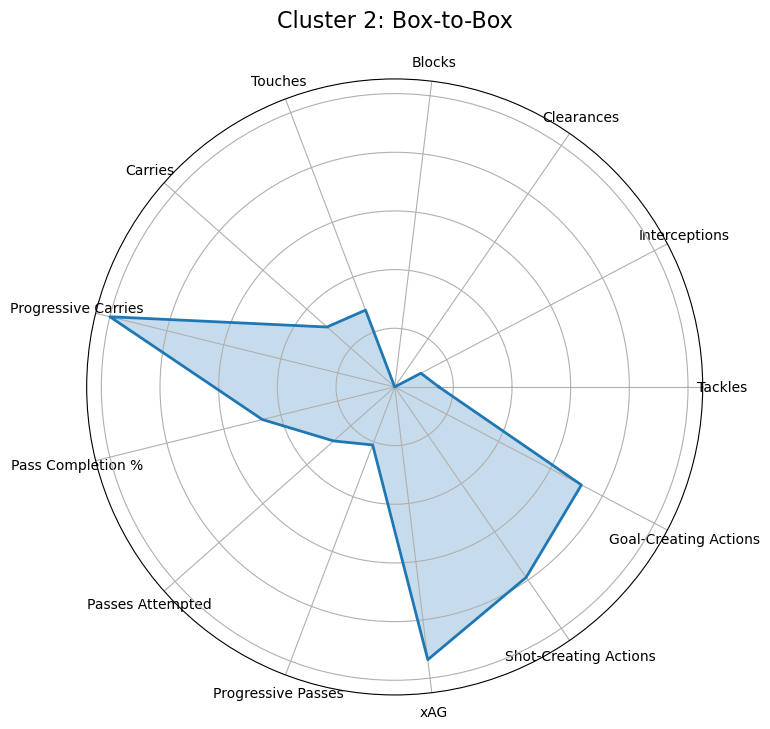


🔹 Cluster 2: Box-to-Box (16 players)
 - Marco Asensio
 - Jean-Ricner Bellegarde
 - Matheus Cunha
 - Mikkel Damsgaard
 - Julio Enciso
 - Julio Enciso
 - Eberechi Eze
 - Phil Foden
 - Alejandro Garnacho
 - Gonçalo Guedes
 - Justin Kluivert
 - Dejan Kulusevski
 - Dwight McNeil
 - Pablo Sarabia
 - Bernardo Silva
 - Joe Willock


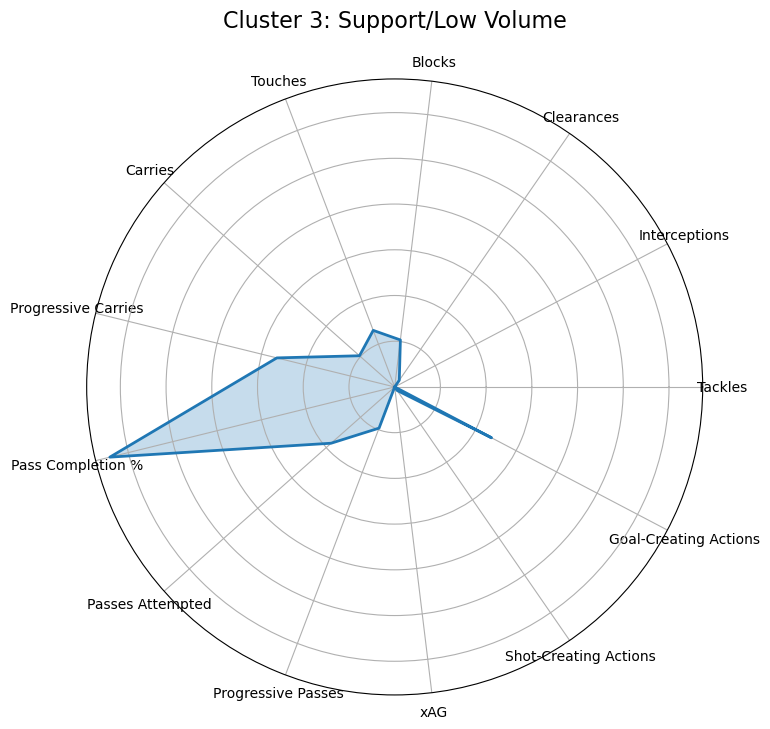


🔹 Cluster 3: Support/Low Volume (10 players)
 - Nathan Broadhead
 - Conor Chaplin
 - Danilo
 - Hwang Hee-chan
 - Omari Hutchinson
 - James Mcatee
 - John McGinn
 - Mason Mount
 - Daniel Podence
 - Carlos Soler


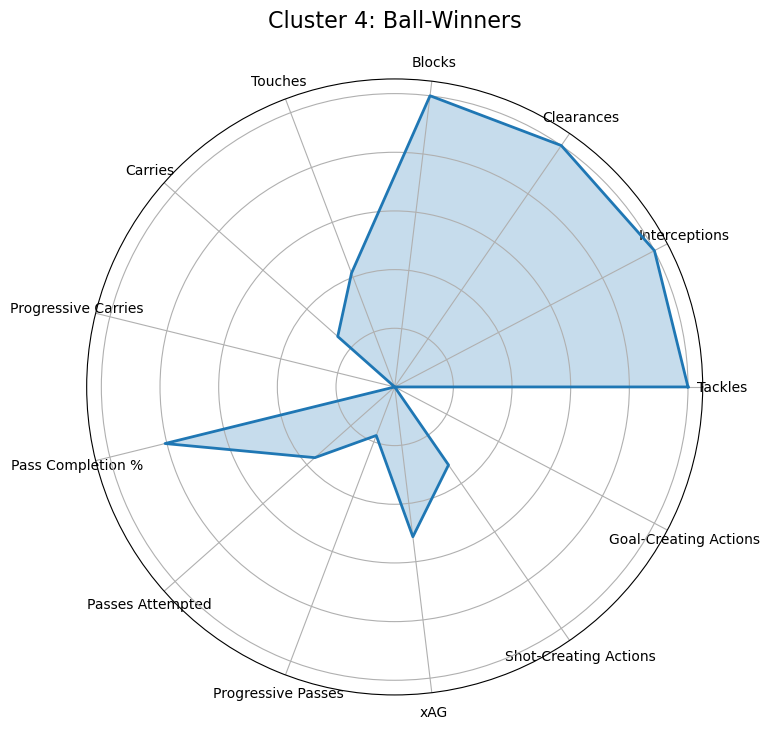


🔹 Cluster 4: Ball-Winners (10 players)
 - Emi Buendía
 - Kiernan Dewsbury-Hall
 - Nicolás Domínguez
 - Luis Guilherme
 - Joelinton
 - Joshua King
 - Mikel Merino
 - Lucas Paquetá
 - Jaden Philogene Bidace
 - Tyler Adams


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ======== FEATURE CONFIG ======== #

# Raw feature names from your DataFrame
features = [
    'Tkl', 'Int', 'Clr', 'Blocks', 'Touches', 'Carries', 'PrgC_y',
    'Cmp%', 'Att_x', 'PrgP_y', 'xAG.1', 'SCA', 'GCA'
]

# Readable feature names for radar chart labels
feature_labels = [
    'Tackles', 'Interceptions', 'Clearances', 'Blocks', 'Touches', 'Carries', 'Progressive Carries',
    'Pass Completion %', 'Passes Attempted', 'Progressive Passes', 'xAG', 'Shot-Creating Actions', 'Goal-Creating Actions'
]

# Optional: name each cluster
cluster_names = {
    0: "Utility Midfielders",
    1: "Elite Creators",
    2: "Box-to-Box",
    3: "Support/Low Volume",
    4: "Ball-Winners"
}

# ======== DATA PREP ======== #

# Average stats per cluster
cluster_profiles = df.groupby('Cluster')[features].mean()

# Normalize for radar display (0–1 scale)
cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Radar config
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # to close the radar loop

# Ensure 'visuals' folder exists
os.makedirs("visuals", exist_ok=True)

# ======== RADAR CHART GENERATION ======== #

for cluster_id in cluster_profiles_norm.index:
    values = cluster_profiles_norm.loc[cluster_id].tolist()
    values += values[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)
    
    # Set chart options
    ax.set_title(f"Cluster {cluster_id}: {cluster_names[cluster_id]}", size=16, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_labels, fontsize=10)
    ax.set_yticklabels([])
    ax.grid(True)

    # Clean cluster name for file-safe format
    cluster_label = cluster_names[cluster_id].replace(" ", "_").replace("/", "-").lower()
    filename = f"visuals/cluster_{cluster_id}_{cluster_label}.png"

    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Print players in this cluster
    players = df[df['Cluster'] == cluster_id]['Player'].tolist()
    print(f"\n🔹 Cluster {cluster_id}: {cluster_names[cluster_id]} ({len(players)} players)")
    for player in players:
        print(f" - {player}")


###  💾 Step 3: Export labeled data